In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

In [13]:
dataset = pd.read_csv ("/content/drive/MyDrive/Data/data.csv")


In [92]:
dataset.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [24]:
dataset.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB


In [26]:
duplicate = dataset.duplicated().sum()
print("Total Dupes:", duplicate)

Total Dupes: 0


In [27]:
dataset = dataset.drop_duplicates()

In [ ]:
x = dataset.drop("")

Dependent Variable: Number of Barriers

Independent Variables: Area, Sensing Range,Transmission Range,   
 Number of Sensor Nodes

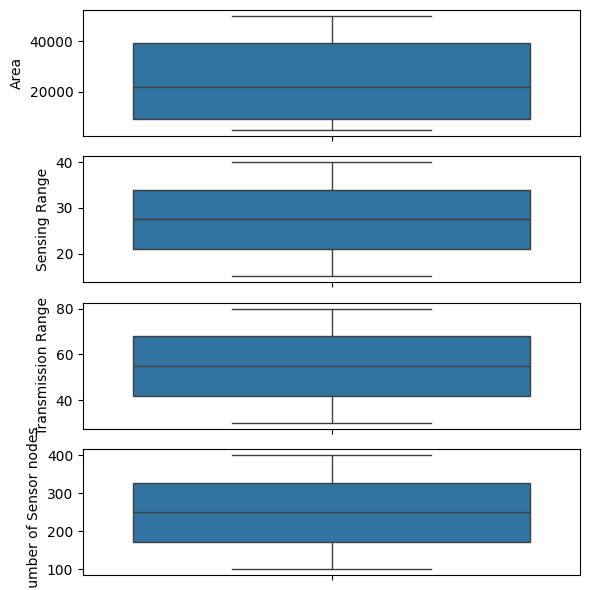

In [73]:
fig, axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(dataset['Area'], ax = axs[0])
plt2 = sns.boxplot(dataset['Sensing Range'], ax = axs[1])
plt3 = sns.boxplot(dataset['Transmission Range'], ax = axs[2])
plt4 = sns.boxplot(dataset['Number of Sensor nodes'], ax = axs[3])
plt.tight_layout()

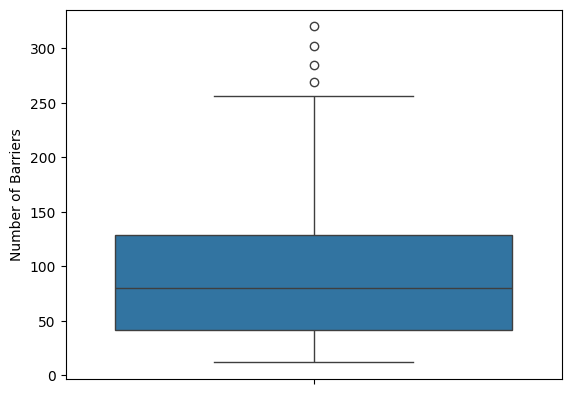

In [71]:
sns.boxplot(dataset['Number of Barriers'])
plt.show()

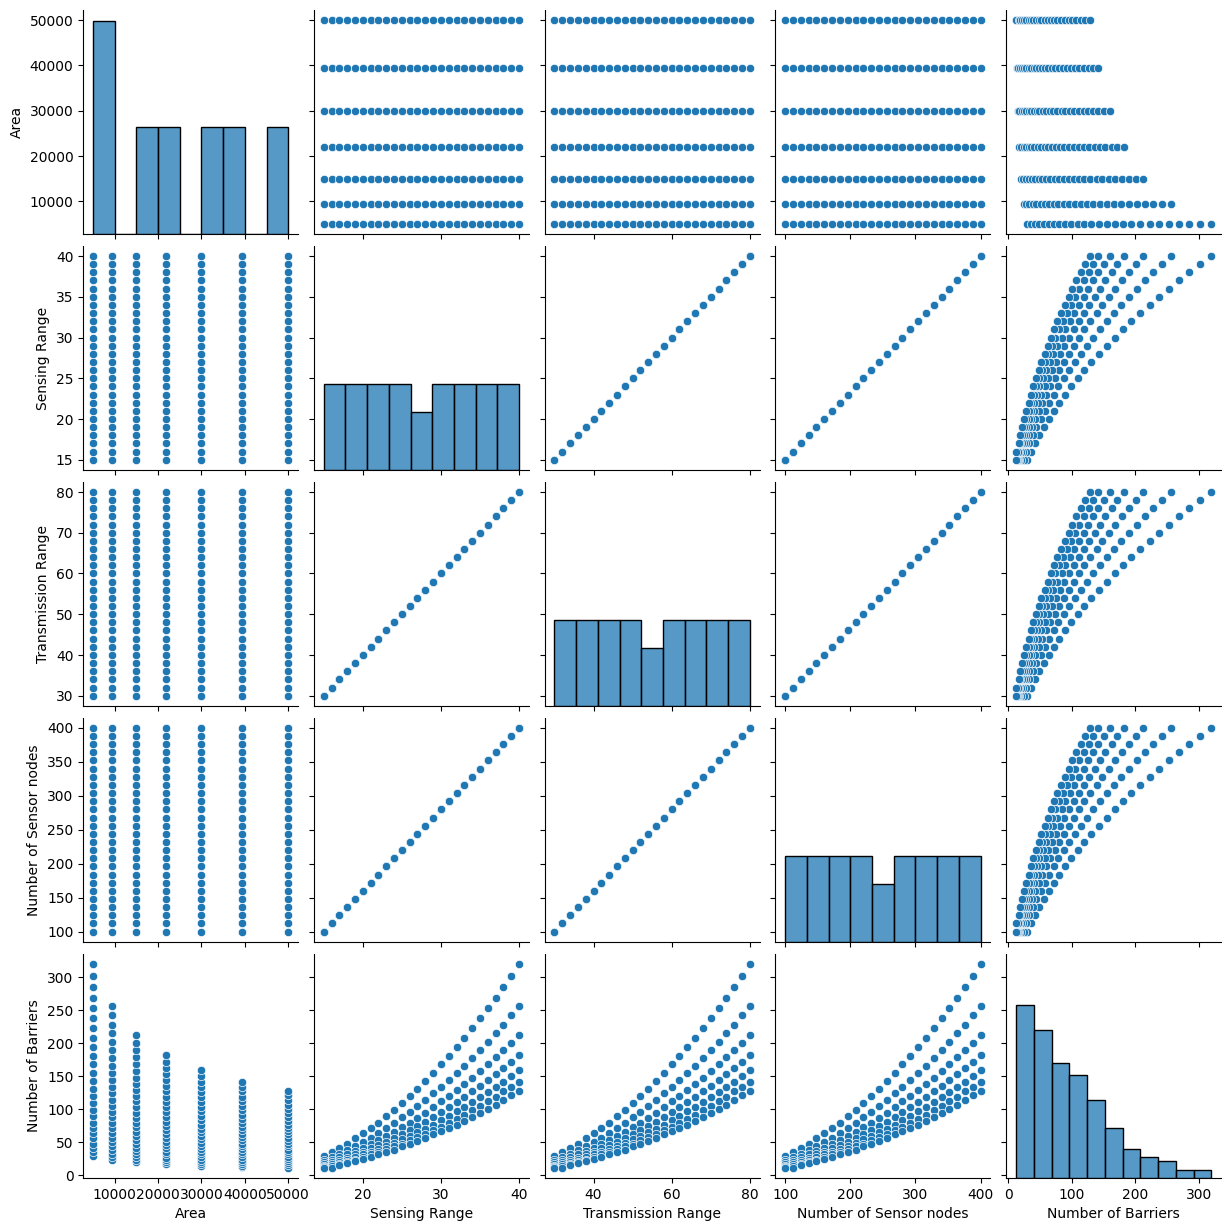

In [75]:
sns.pairplot(dataset)

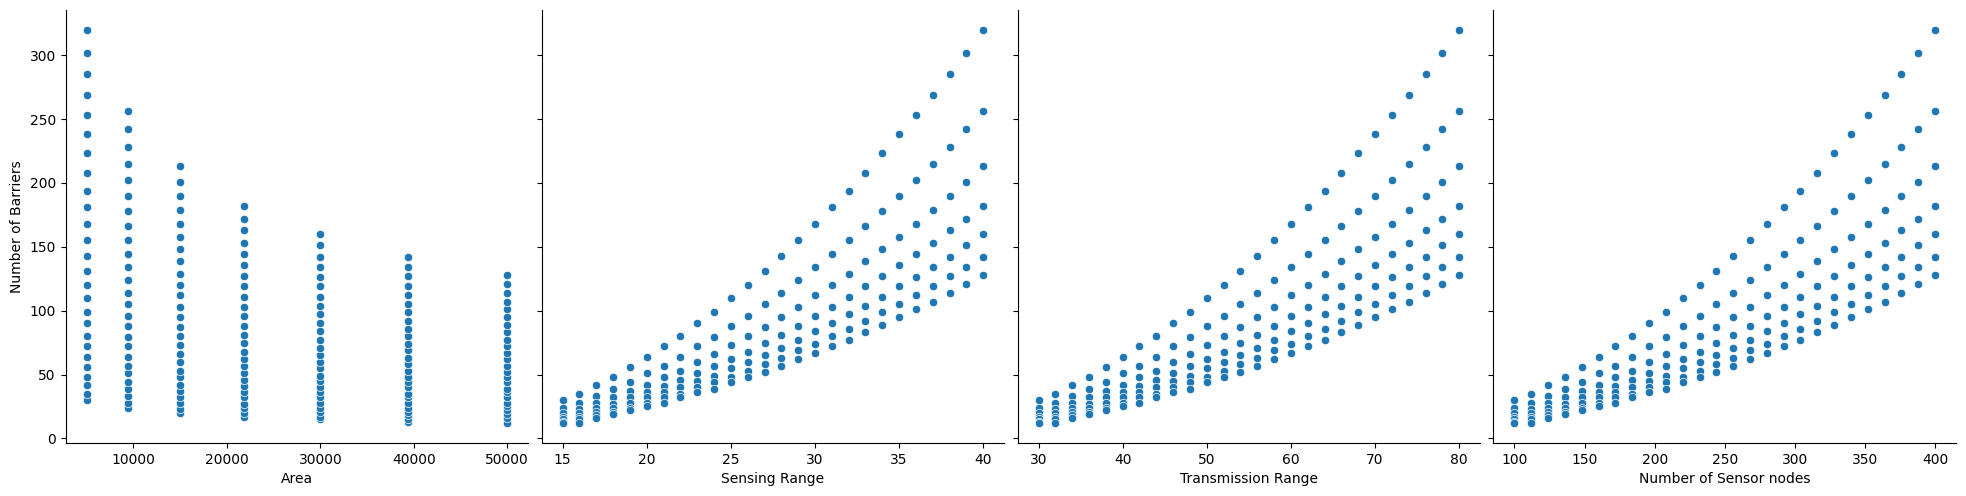

In [39]:
sns.pairplot(dataset, x_vars=['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes'], y_vars='Number of Barriers', height=5, aspect=1, kind='scatter')
plt.show()

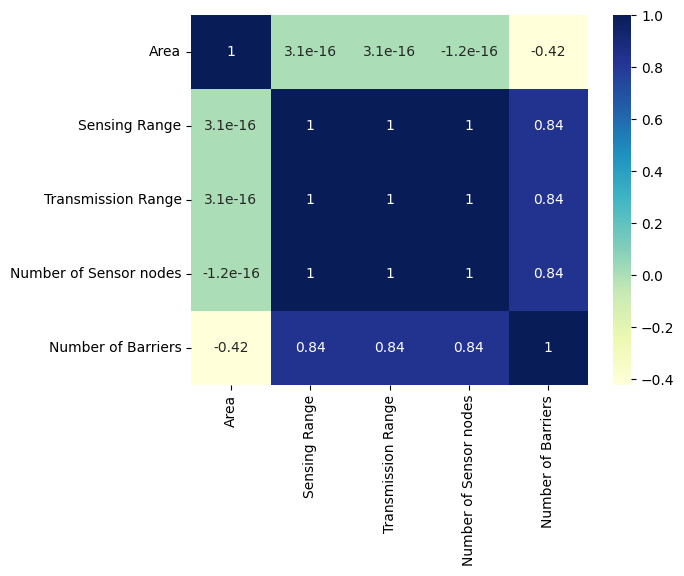

In [40]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [76]:
x = dataset.drop(['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes'], axis=1)
y = dataset['Number of Barriers']
print("X values are: \n", x)
print("Y values are: \n", y)

X values are: 
      Number of Barriers
0                    30
1                    35
2                    42
3                    48
4                    56
..                  ...
177                 101
178                 107
179                 114
180                 121
181                 128

[182 rows x 1 columns]
Y values are: 
 0       30
1       35
2       42
3       48
4       56
      ... 
177    101
178    107
179    114
180    121
181    128
Name: Number of Barriers, Length: 182, dtype: int64


In [77]:
x = dataset['Number of Sensor nodes']
y = dataset['Number of Barriers']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [78]:
x_train.head()

134    148
89     232
12     244
16     292
145    280
Name: Number of Sensor nodes, dtype: int64

In [79]:
y_train.head()

134     24
89      68
12     131
16     181
145     74
Name: Number of Barriers, dtype: int64

In [80]:
import statsmodels.api as sm


**Building Model**

In [81]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [82]:
lr.params

const                    -59.861692
Number of Sensor nodes     0.628078
dtype: float64

In [83]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Number of Barriers   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     304.6
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.62e-35
Time:                        05:44:56   Log-Likelihood:                -639.86
No. Observations:                 127   AIC:                             1284.
Df Residuals:                     125   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -59

**Model** **Evaluation**

<ipython-input-85-2edf53297520>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


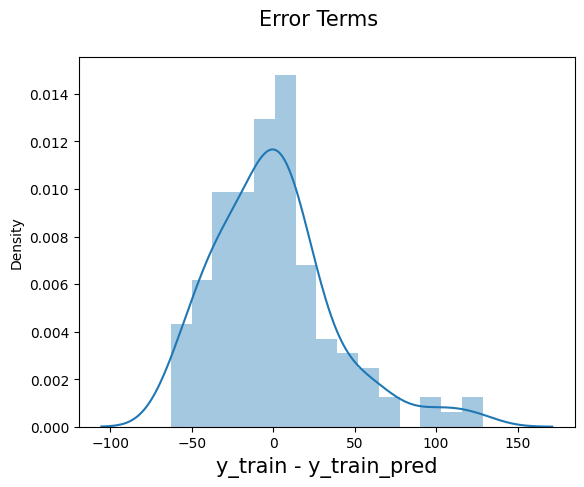

In [85]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**Looking for patterns in the residuals**

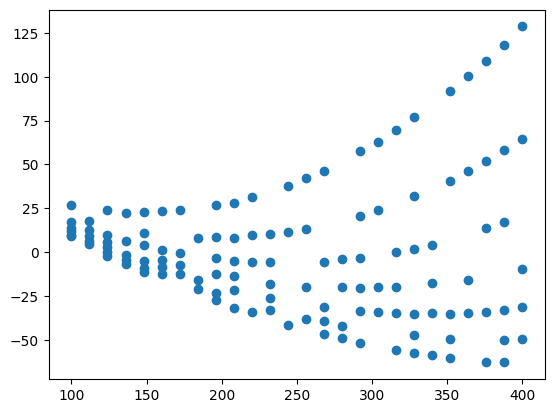

In [87]:
plt.scatter(x_train,res)
plt.show()

**Predictions on the Test Set**

In [88]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [89]:
y_pred.head()

11      85.852422
161     40.630801
15     116.000170
73     161.221792
46     153.684855
dtype: float64

**Looking at the RMSE**

In [90]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

31.364352695497654

**Checking the R-squared on the test set**

In [91]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6612978064854727

**This is all**